In [1]:
import os
os.chdir("E:\\20190923 Newcastle-M.Res\\OneDrive - Newcastle University\\21_22_autumn\\211018\\code\\Data\\vesseldata\\0_Processed")
os.getcwd()

'E:\\20190923 Newcastle-M.Res\\OneDrive - Newcastle University\\21_22_autumn\\211018\\code\\Data\\vesseldata\\0_Processed'

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

## Load in local file

In [7]:
d2019 = pd.read_json('LPL_2019.json')
d2020 = pd.read_json('LPL_2020.json')

In [8]:
df = pd.concat([d2019,d2020], ignore_index=True)
df

,NAME,ARRIVING,LEAVING,SERVICE,SERVICEHOURS
0,NORD PACIFIC,2019-01-04 13:24:00,2019-01-09 18:33:00,5 days 05:09:00,125.150000
1,EMMA BULKER,2019-01-11 05:26:00,2019-01-14 18:50:00,3 days 13:24:00,85.400000
2,NORD SAVANNAH,2019-02-11 04:27:00,2019-02-12 23:50:00,1 days 19:23:00,43.383333
3,YULIA,2019-02-14 20:37:00,2019-02-17 08:16:00,2 days 11:39:00,59.650000
4,SWAN RIVER,2019-02-28 11:29:00,2019-03-02 19:59:00,2 days 08:30:00,56.500000
...,...,...,...,...,...
61,GIANTS CAUSEWAY,2020-12-03 03:52:00,2020-12-12 05:04:00,9 days 01:12:00,217.200000
62,COE LAURA,2020-12-16 22:30:00,2020-12-20 00:42:00,3 days 02:12:00,74.200000
63,GREEN GEM,2020-12-20 08:40:00,2020-12-27 18:09:00,7 days 09:29:00,177.483333
64,LEGIONY POLSKIE,2020-12-28 12:13:00,2021-01-04 05:36:00,6 days 17:23:00,161.383333


In [9]:
df['ARRIVING'] = pd.to_datetime(df['ARRIVING'], format = '%Y-%m-%d %H:%M:%S')
df['LEAVING'] = pd.to_datetime(df['LEAVING'], format = '%Y-%m-%d %H:%M:%S')

### Get Interval and interval hours

In [10]:
interval = list()
for i in list(range(1, len(df['ARRIVING']))) : 
    interval.append(df['ARRIVING'][i]-df['ARRIVING'][i-1])

In [11]:
intHours = list()
for i in interval:
    intHours.append((i.total_seconds()/3600))

In [12]:
interval.append('n/a')
intHours.append('n/a')

#### add interval to dataframe

In [13]:
df['INTERVAL'] = interval
df['INTERVALhours'] = intHours
df=df.rename(columns = {'SERVICEHOURS':'SERVICEhours'})

In [14]:
df = df.drop([65])

### Add ship and Cargo parameter

In [15]:
ship = pd.read_csv('ShipPara.csv')

In [16]:
ship = ship.drop(columns=['NAME'])

In [17]:
df = df.join(ship)

In [18]:
df

,NAME,ARRIVING,LEAVING,SERVICE,SERVICEhours,INTERVAL,INTERVALhours,GT,DWT,NetTonnage,GrainVolume,Shipload
0,NORD PACIFIC,2019-01-04 13:24:00,2019-01-09 18:33:00,5 days 05:09:00,125.150000,6 days 16:02:00,160.033333,35035,61221,19844,77476,67725.25454
1,EMMA BULKER,2019-01-11 05:26:00,2019-01-14 18:50:00,3 days 13:24:00,85.400000,30 days 23:01:00,743.016667,19812,31887,10395,40454,35332.50233
2,NORD SAVANNAH,2019-02-11 04:27:00,2019-02-12 23:50:00,1 days 19:23:00,43.383333,3 days 16:10:00,88.166667,22866,37067,12519,45790,37966.24223
3,YULIA,2019-02-14 20:37:00,2019-02-17 08:16:00,2 days 11:39:00,59.650000,13 days 14:52:00,326.866667,19814,30878,10208,38635,32033.75777
4,SWAN RIVER,2019-02-28 11:29:00,2019-03-02 19:59:00,2 days 08:30:00,56.500000,5 days 06:39:00,126.65,31360,55947,18504,70811,52172.14050
...,...,...,...,...,...,...,...,...,...,...,...,...
60,KYPROS SPIRIT,2020-11-20 17:58:00,2020-11-29 13:28:00,8 days 19:30:00,211.500000,12 days 09:54:00,297.9,41759,77998,26050,90911,56577.28783
61,GIANTS CAUSEWAY,2020-12-03 03:52:00,2020-12-12 05:04:00,9 days 01:12:00,217.200000,13 days 18:38:00,330.633333,35872,63197,21223,77493,57780.49306
62,COE LAURA,2020-12-16 22:30:00,2020-12-20 00:42:00,3 days 02:12:00,74.200000,3 days 10:10:00,82.166667,7341,12523,4279,14950,11147.05033
63,GREEN GEM,2020-12-20 08:40:00,2020-12-27 18:09:00,7 days 09:29:00,177.483333,8 days 03:33:00,195.55,23885,38503,12685,48502,36164.16288


In [21]:
df[['ARRIVING','LEAVING','SERVICE','INTERVAL']] = df[['ARRIVING','LEAVING','SERVICE','INTERVAL']].astype(str)

In [22]:
df.to_json('LPL.json')

## Statistic testing and Modelling

In [3]:
import scipy.stats

In [4]:
import matplotlib.pyplot as plt

In [55]:
df = pd.read_json('LPL.json')

In [56]:
df.head()

,NAME,ARRIVING,LEAVING,SERVICE,SERVICEhours,INTERVAL,INTERVALhours,GT,DWT,NetTonnage,GrainVolume,Shipload
0,NORD PACIFIC,2019-01-04 13:24:00,2019-01-09 18:33:00,5 days 05:09:00,125.150000,6 days 16:02:00,160.033333,35035,61221,19844,77476,67725.25454
1,EMMA BULKER,2019-01-11 05:26:00,2019-01-14 18:50:00,3 days 13:24:00,85.400000,30 days 23:01:00,743.016667,19812,31887,10395,40454,35332.50233
2,NORD SAVANNAH,2019-02-11 04:27:00,2019-02-12 23:50:00,1 days 19:23:00,43.383333,3 days 16:10:00,88.166667,22866,37067,12519,45790,37966.24223
3,YULIA,2019-02-14 20:37:00,2019-02-17 08:16:00,2 days 11:39:00,59.650000,13 days 14:52:00,326.866667,19814,30878,10208,38635,32033.75777
4,SWAN RIVER,2019-02-28 11:29:00,2019-03-02 19:59:00,2 days 08:30:00,56.500000,5 days 06:39:00,126.650000,31360,55947,18504,70811,52172.14050


In [57]:
df['ARRIVING'] = pd.to_datetime(df['ARRIVING'], format = '%Y-%m-%d %H:%M:%S')
df['LEAVING'] = pd.to_datetime(df['LEAVING'], format = '%Y-%m-%d %H:%M:%S')

In [58]:
df[["SERVICEhours", "INTERVALhours",'GT','DWT','NetTonnage','GrainVolume','Shipload']] = df[["SERVICEhours", "INTERVALhours",'GT','DWT','NetTonnage','GrainVolume','Shipload']].apply(pd.to_numeric)

#### completing missing shipload data from regression

In [19]:
from sklearn import linear_model
from sklearn.metrics import r2_score

In [59]:
df_load = df[df['Shipload'].notna()]

In [62]:
X = df_load[['GT','DWT','NetTonnage','GrainVolume']]
y = df_load['Shipload']
regr_load = linear_model.LinearRegression()
regr_load.fit(X, y)
y_pre = regr_load.predict(X)
r2_score(y,y_pre)

0.7326330469029878

In [63]:
df_noload = df.iloc[23:32] #get rows without shipload data
X_noload = df_noload[['GT','DWT','NetTonnage','GrainVolume']]
y_pre_noload = regr_load.predict(X_noload)
df_noload['Shipload'] = y_pre_noload

<ipython-input-63-d2d6d2e7872e>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_noload['Shipload'] = y_pre_noload


In [65]:
df_all = pd.concat([df_load,df_noload]).sort_index() #complete df by contat all rows

In [67]:
df_all['HandlingRate'] = df_all['Shipload'] / df_all['SERVICEhours'] #adding the feature of HandlingRate

In [68]:
df_all.head(60) #the whole historical vessel population is finished 

,NAME,ARRIVING,LEAVING,SERVICE,SERVICEhours,INTERVAL,INTERVALhours,GT,DWT,NetTonnage,GrainVolume,Shipload,HandlingRate
0,NORD PACIFIC,2019-01-04 13:24:00,2019-01-09 18:33:00,5 days 05:09:00,125.150000,6 days 16:02:00,160.033333,35035,61221,19844,77476,67725.254540,541.152653
1,EMMA BULKER,2019-01-11 05:26:00,2019-01-14 18:50:00,3 days 13:24:00,85.400000,30 days 23:01:00,743.016667,19812,31887,10395,40454,35332.502330,413.729535
2,NORD SAVANNAH,2019-02-11 04:27:00,2019-02-12 23:50:00,1 days 19:23:00,43.383333,3 days 16:10:00,88.166667,22866,37067,12519,45790,37966.242230,875.134281
3,YULIA,2019-02-14 20:37:00,2019-02-17 08:16:00,2 days 11:39:00,59.650000,13 days 14:52:00,326.866667,19814,30878,10208,38635,32033.757770,537.028630
4,SWAN RIVER,2019-02-28 11:29:00,2019-03-02 19:59:00,2 days 08:30:00,56.500000,5 days 06:39:00,126.650000,31360,55947,18504,70811,52172.140500,923.400717
5,PU LAN HAI,2019-03-05 18:08:00,2019-03-14 02:15:00,8 days 08:07:00,200.116667,13 days 16:18:00,328.300000,33044,56897,19231,71634,52778.510580,263.738705
6,VENTURE LUCK,2019-03-19 10:26:00,2019-03-22 20:11:00,3 days 09:45:00,81.750000,30 days 03:26:00,723.433333,26411,43413,13855,53000,39049.348920,477.667877
7,GOODWYN ISLAND,2019-04-18 13:52:00,2019-04-22 17:45:00,4 days 03:53:00,99.883333,5 days 03:34:00,123.566667,35684,63963,21466,79014,63022.445170,630.960572
8,SANTA KATARINA,2019-04-23 17:26:00,2019-04-30 22:21:00,7 days 04:55:00,172.916667,16 days 12:15:00,396.250000,32287,58096,19458,72689,57977.554830,335.291883
9,NORD BOSPORUS,2019-05-10 05:41:00,2019-05-14 11:48:00,4 days 06:07:00,102.116667,4 days 06:44:00,102.733333,34589,60457,19663,76121,65662.286470,643.012435


In [69]:
df_all[['ARRIVING','LEAVING','SERVICE','INTERVAL']] = df_all[['ARRIVING','LEAVING','SERVICE','INTERVAL']].astype(str)

In [70]:
df_all.to_json('LPL_all.json') #save the population to local directory

# Analyses from here

In [1]:
import os
os.chdir("E:\\20190923 Newcastle-M.Res\\OneDrive - Newcastle University\\21_22_autumn\\211018\\code\\Data\\vesseldata\\0_Processed")
os.getcwd()

'E:\\20190923 Newcastle-M.Res\\OneDrive - Newcastle University\\21_22_autumn\\211018\\code\\Data\\vesseldata\\0_Processed'

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import scipy.stats
from sklearn import linear_model
from sklearn.metrics import r2_score

In [3]:
df = pd.read_json('LPL_all.json')

In [4]:
df['ARRIVING'] = pd.to_datetime(df['ARRIVING'], format = '%Y-%m-%d %H:%M:%S')
df['LEAVING'] = pd.to_datetime(df['LEAVING'], format = '%Y-%m-%d %H:%M:%S')

In [5]:
df[["SERVICEhours", "INTERVALhours",'GT','DWT','NetTonnage','GrainVolume','Shipload','HandlingRate']] = df[["SERVICEhours", "INTERVALhours",'GT','DWT','NetTonnage','GrainVolume','Shipload','HandlingRate']].apply(pd.to_numeric)

In [12]:
df.head(60)

,NAME,ARRIVING,LEAVING,SERVICE,SERVICEhours,INTERVAL,INTERVALhours,GT,DWT,NetTonnage,GrainVolume,Shipload,HandlingRate
0,NORD PACIFIC,2019-01-04 13:24:00,2019-01-09 18:33:00,5 days 05:09:00,125.150000,6 days 16:02:00,160.033333,35035,61221,19844,77476,67725.254540,541.152653
1,EMMA BULKER,2019-01-11 05:26:00,2019-01-14 18:50:00,3 days 13:24:00,85.400000,30 days 23:01:00,743.016667,19812,31887,10395,40454,35332.502330,413.729535
2,NORD SAVANNAH,2019-02-11 04:27:00,2019-02-12 23:50:00,1 days 19:23:00,43.383333,3 days 16:10:00,88.166667,22866,37067,12519,45790,37966.242230,875.134281
3,YULIA,2019-02-14 20:37:00,2019-02-17 08:16:00,2 days 11:39:00,59.650000,13 days 14:52:00,326.866667,19814,30878,10208,38635,32033.757770,537.028630
4,SWAN RIVER,2019-02-28 11:29:00,2019-03-02 19:59:00,2 days 08:30:00,56.500000,5 days 06:39:00,126.650000,31360,55947,18504,70811,52172.140500,923.400717
5,PU LAN HAI,2019-03-05 18:08:00,2019-03-14 02:15:00,8 days 08:07:00,200.116667,13 days 16:18:00,328.300000,33044,56897,19231,71634,52778.510580,263.738705
6,VENTURE LUCK,2019-03-19 10:26:00,2019-03-22 20:11:00,3 days 09:45:00,81.750000,30 days 03:26:00,723.433333,26411,43413,13855,53000,39049.348920,477.667877
7,GOODWYN ISLAND,2019-04-18 13:52:00,2019-04-22 17:45:00,4 days 03:53:00,99.883333,5 days 03:34:00,123.566667,35684,63963,21466,79014,63022.445170,630.960572
8,SANTA KATARINA,2019-04-23 17:26:00,2019-04-30 22:21:00,7 days 04:55:00,172.916667,16 days 12:15:00,396.250000,32287,58096,19458,72689,57977.554830,335.291883
9,NORD BOSPORUS,2019-05-10 05:41:00,2019-05-14 11:48:00,4 days 06:07:00,102.116667,4 days 06:44:00,102.733333,34589,60457,19663,76121,65662.286470,643.012435


In [7]:
df['SERVICEhours'].mean()

133.8764102564031

In [8]:
df['SERVICEhours'].sum()

8701.966666666201

In [10]:
8702/(24*365*2)

0.49668949771689497

array([[<AxesSubplot:title={'center':'SERVICEhours'}>]], dtype=object)

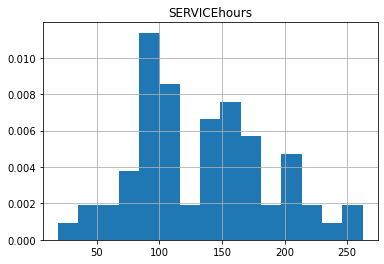

In [7]:
df.hist(column='SERVICEhours',bins=15,density=True)

In [9]:
df['SERVICEhours'].mean(),df['SERVICEhours'].min(),df['SERVICEhours'].max()

(133.8764102564031, 18.9666666667, 262.3833333333)

### Distribution of Interval

array([[<AxesSubplot:title={'center':'INTERVALhours'}>]], dtype=object)

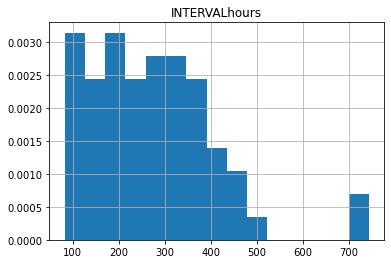

In [7]:
df.hist(column='INTERVALhours',bins=15,density=True)

In [8]:
data = df['INTERVALhours']

In [9]:
data

0     160.033333
1     743.016667
2      88.166667
3     326.866667
4     126.650000
         ...    
60    297.900000
61    330.633333
62     82.166667
63    195.550000
64    280.966667
Name: INTERVALhours, Length: 65, dtype: float64

In [10]:
data.mean(),data.min(),data.max()

(271.62743589743843, 81.85, 743.0166666667)

In [11]:
x = np.linspace(np.min(data),np.max(data))

#### Exponential

In [12]:
[loc,scale]  = scipy.stats.expon.fit(data,floc=0)

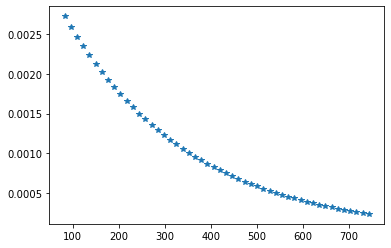

In [13]:
plt.plot(x,scipy.stats.expon.pdf(x, loc, scale),"*")

In [14]:
[loc,scale]

[0.0, 271.6274358974385]

#### Weibull

In [26]:
[w_a,w_c,w_loc,w_scale] = scipy.stats.exponweib.fit(data,floc=0 )

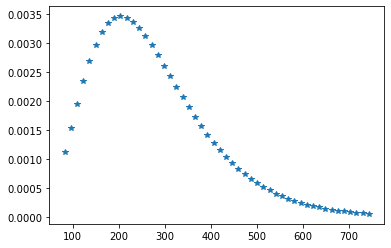

In [27]:
plt.plot(x,scipy.stats.exponweib.pdf(x, w_a, w_c,w_loc,w_scale),"*")

In [28]:
[w_a,w_c,w_loc,w_scale]

[3.855699545825706, 1.1666796836812183, 0, 149.64935002757335]

#### Gamma

In [16]:
[a_fit,loc_fit,scale_fit] = scipy.stats.gamma.fit(data,floc=0)

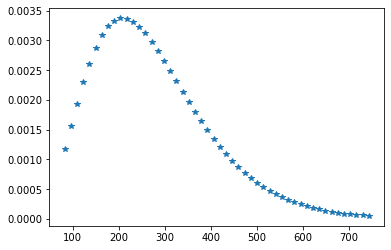

In [17]:
plt.plot(x,scipy.stats.gamma.pdf(x,a_fit, loc_fit, scale_fit),"*")

In [18]:
[a_fit,loc_fit,scale_fit]

[4.254709590778958, 0, 63.841592499315226]

### Not fixing location to 0

#### Exponential

In [34]:
[loc,scale] = scipy.stats.expon.fit(data)

In [35]:
[loc,scale]

[81.85, 189.7774358974385]

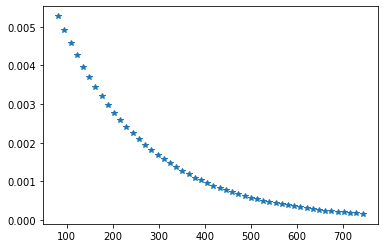

In [36]:
plt.plot(x,scipy.stats.expon.pdf(x, loc, scale),"*")

#### Weibull

In [32]:
[w_a,w_c,w_loc,w_scale] = scipy.stats.exponweib.fit(data)

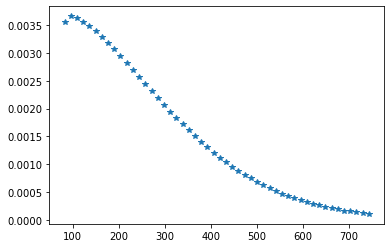

In [33]:
plt.plot(x,scipy.stats.exponweib.pdf(x, w_a, w_c,w_loc,w_scale),"*")

In [34]:
[w_a,w_c,w_loc,w_scale]

[0.6508044581734529, 1.5509466059025905, 81.61433911627685, 265.9686019914516]

#### Gamma

In [35]:
[a_fit,loc_fit,scale_fit] = scipy.stats.gamma.fit(data)

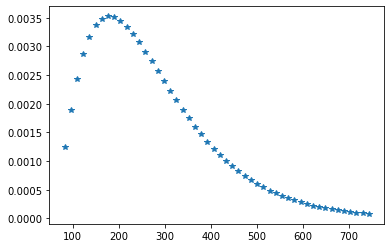

In [36]:
plt.plot(x,scipy.stats.gamma.pdf(x,a_fit, loc_fit, scale_fit),"*")

In [37]:
[a_fit,loc_fit,scale_fit]

[2.3134627884161008, 57.06996594608556, 92.74298757382144]

#### Chi squared test on selected distribution

## Getting shipclass and auxiliary engine

In [7]:
conditions  = [ df['DWT'] <= 9999, (df['DWT'] > 9999) & (df['DWT'] <= 34999), 
               (df['DWT'] > 34999) & (df['DWT'] <= 59999),df['DWT'] > 59999 ]

In [8]:
choices = ['BULK1','BULK2','BULK3','BULK4']

In [9]:
df['Class'] = np.select(conditions, choices, default=np.nan)

In [10]:
df

,NAME,ARRIVING,LEAVING,SERVICE,SERVICEhours,INTERVAL,INTERVALhours,GT,DWT,NetTonnage,GrainVolume,Shipload,HandlingRate,Class
0,NORD PACIFIC,2019-01-04 13:24:00,2019-01-09 18:33:00,5 days 05:09:00,125.150000,6 days 16:02:00,160.033333,35035,61221,19844,77476,67725.25454,541.152653,BULK4
1,EMMA BULKER,2019-01-11 05:26:00,2019-01-14 18:50:00,3 days 13:24:00,85.400000,30 days 23:01:00,743.016667,19812,31887,10395,40454,35332.50233,413.729535,BULK2
2,NORD SAVANNAH,2019-02-11 04:27:00,2019-02-12 23:50:00,1 days 19:23:00,43.383333,3 days 16:10:00,88.166667,22866,37067,12519,45790,37966.24223,875.134281,BULK3
3,YULIA,2019-02-14 20:37:00,2019-02-17 08:16:00,2 days 11:39:00,59.650000,13 days 14:52:00,326.866667,19814,30878,10208,38635,32033.75777,537.028630,BULK2
4,SWAN RIVER,2019-02-28 11:29:00,2019-03-02 19:59:00,2 days 08:30:00,56.500000,5 days 06:39:00,126.650000,31360,55947,18504,70811,52172.14050,923.400717,BULK3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60,KYPROS SPIRIT,2020-11-20 17:58:00,2020-11-29 13:28:00,8 days 19:30:00,211.500000,12 days 09:54:00,297.900000,41759,77998,26050,90911,56577.28783,267.504907,BULK4
61,GIANTS CAUSEWAY,2020-12-03 03:52:00,2020-12-12 05:04:00,9 days 01:12:00,217.200000,13 days 18:38:00,330.633333,35872,63197,21223,77493,57780.49306,266.024370,BULK4
62,COE LAURA,2020-12-16 22:30:00,2020-12-20 00:42:00,3 days 02:12:00,74.200000,3 days 10:10:00,82.166667,7341,12523,4279,14950,11147.05033,150.229789,BULK2
63,GREEN GEM,2020-12-20 08:40:00,2020-12-27 18:09:00,7 days 09:29:00,177.483333,8 days 03:33:00,195.550000,23885,38503,12685,48502,36164.16288,203.760895,BULK3


In [28]:
len(df[df['Class'] == 'BULK1'].index)

0

In [29]:
len(df[df['Class'] == 'BULK2'].index)

11

In [30]:
len(df[df['Class'] == 'BULK3'].index)

33

In [31]:
len(df[df['Class'] == 'BULK4'].index)

21

### Distribution of shipload

#### treat as whole

array([[<AxesSubplot:title={'center':'Shipload'}>]], dtype=object)

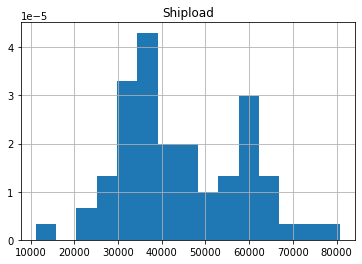

In [77]:
df.hist(column='Shipload',bins=15,density=True)

In [78]:
data_load = df['Shipload']

In [14]:
scipy.stats.norm.fit(data_load)

(43910.86921410715, 14224.46447186479)

In [79]:
[mean,std] = scipy.stats.norm.fit(data_load)

In [80]:
x_load = np.linspace(np.min(data_load),np.max(data_load))

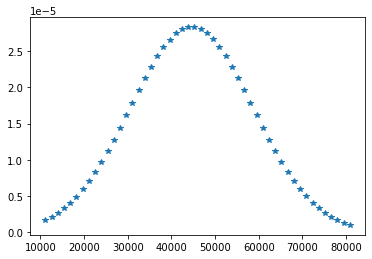

In [82]:
plt.plot(x_load,scipy.stats.norm.pdf(x_load, mean, std),"*")

#### separate big and small boat

In [7]:
df_small = df[df['DWT'] < 60000]

array([[<AxesSubplot:title={'center':'Shipload'}>]], dtype=object)

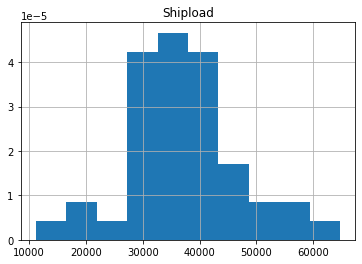

In [8]:
df_small.hist(column='Shipload',bins=10,density=True)

In [9]:
data_load = df_small['Shipload']
scipy.stats.norm.fit(data_load)

(37609.4140999932, 9912.424532557228)

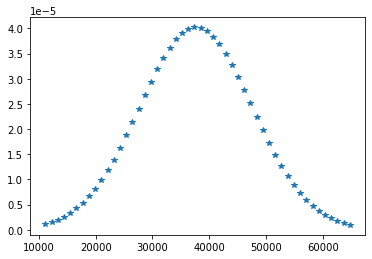

In [10]:
[mean,std] = scipy.stats.norm.fit(data_load)
x_load = np.linspace(np.min(data_load),np.max(data_load))
plt.plot(x_load,scipy.stats.norm.pdf(x_load, mean, std),"*")

In [11]:
df_large = df[df['DWT'] >= 60000]

array([[<AxesSubplot:title={'center':'Shipload'}>]], dtype=object)

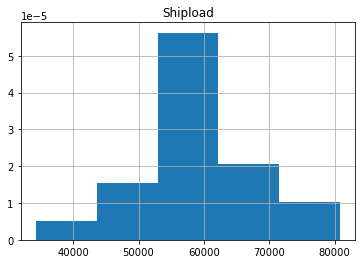

In [12]:
df_large.hist(column='Shipload',bins=5,density=True)

In [13]:
data_load = df_large['Shipload']
scipy.stats.norm.fit(data_load)

(59199.99358474059, 9636.600838663293)

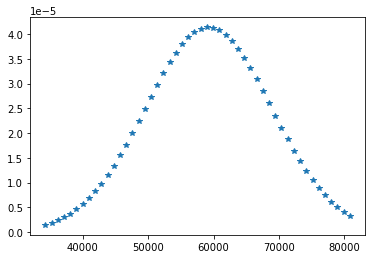

In [14]:
[mean,std] = scipy.stats.norm.fit(data_load)
x_load = np.linspace(np.min(data_load),np.max(data_load))
plt.plot(x_load,scipy.stats.norm.pdf(x_load, mean, std),"*")

#### Separate handy and panamax

In [41]:
df_handy = df[df['DWT'] < 50000]
len(df_handy.index)

38

In [42]:
df_panamax = df[df['DWT'] >= 50000]
len(df_panamax.index)

27

array([[<AxesSubplot:title={'center':'Shipload'}>]], dtype=object)

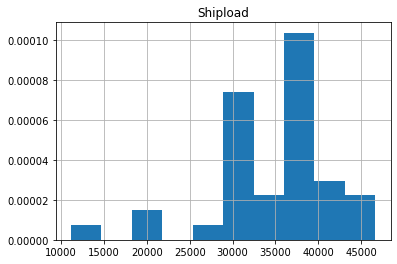

In [44]:
df_handy.hist(column='Shipload',bins=10,density=True)

In [24]:
data_load = df_handy['Shipload']
scipy.stats.norm.fit(data_load)

(34767.75800981293, 7070.799015977125)

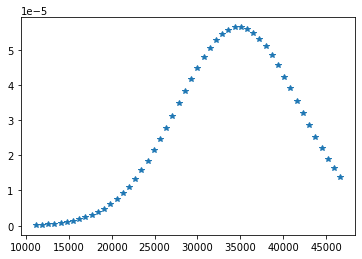

In [25]:
[mean,std] = scipy.stats.norm.fit(data_load)
x_load = np.linspace(np.min(data_load),np.max(data_load))
plt.plot(x_load,scipy.stats.norm.pdf(x_load, mean, std),"*")

array([[<AxesSubplot:title={'center':'Shipload'}>]], dtype=object)

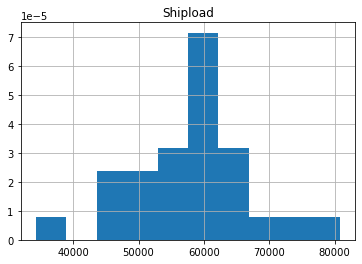

In [20]:
df_panamax.hist(column='Shipload',bins=10,density=True)

In [26]:
data_load = df_panamax['Shipload']
scipy.stats.norm.fit(data_load)

(58401.454863198574, 8992.969281636775)

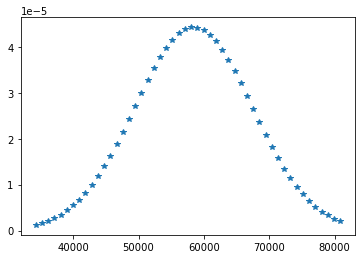

In [27]:
[mean,std] = scipy.stats.norm.fit(data_load)
x_load = np.linspace(np.min(data_load),np.max(data_load))
plt.plot(x_load,scipy.stats.norm.pdf(x_load, mean, std),"*")

## vessel feature and handling rate

<AxesSubplot:xlabel='Shipload', ylabel='HandlingRate'>

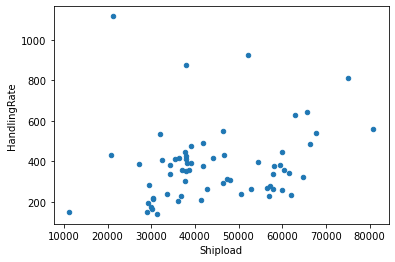

In [11]:
df.plot.scatter(x='Shipload',y='HandlingRate')

<AxesSubplot:xlabel='DWT', ylabel='HandlingRate'>

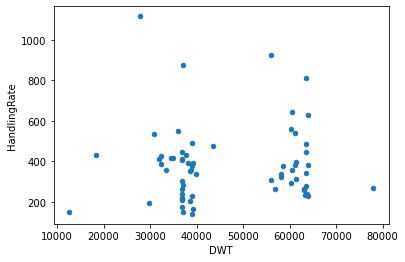

In [14]:
df.plot.scatter(x='DWT', y='HandlingRate')

<AxesSubplot:xlabel='DWT', ylabel='Shipload'>

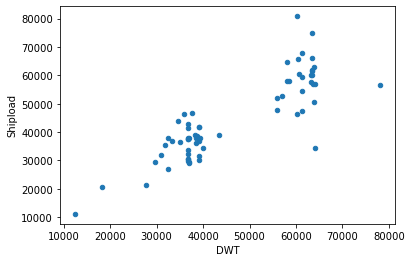

In [24]:
df.plot.scatter(x='DWT', y='Shipload')

<AxesSubplot:xlabel='Shipload', ylabel='DWT'>

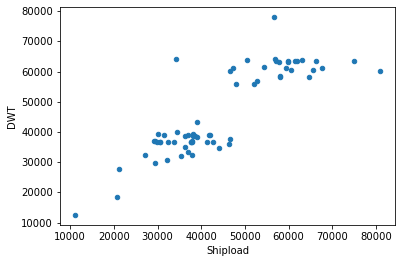

In [25]:
df.plot.scatter(x='Shipload', y='DWT')

array([[<AxesSubplot:title={'center':'HandlingRate'}>]], dtype=object)

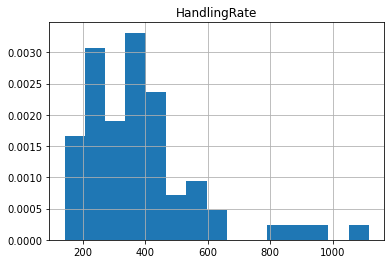

In [94]:
df.hist(column='HandlingRate',bins=15,density=True)

In [11]:
df['HandlingRate'].min()

140.698711209

In [12]:
df['HandlingRate'].mean()

381.83240160999844

In [13]:
df['HandlingRate'].max()

1115.9886036887

In [12]:
df_clean = df[df['HandlingRate'].between(0,800)]

In [13]:
x = df_clean['Shipload']
y = df_clean['HandlingRate']

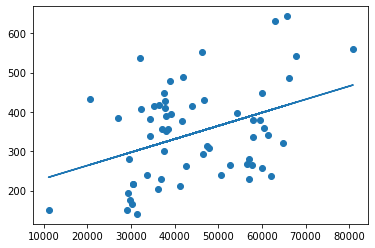

In [14]:
slope, intercept, r, p, std_err = scipy.stats.linregress(x, y)

def myfunc(x):
  return slope * x + intercept

mymodel = list(map(myfunc, x))

plt.scatter(x, y)
plt.plot(x, mymodel)
plt.show()

In [15]:
r

0.38711397981600465

#### Split between large and small vessel

In [13]:
df_clean.head(60)

,NAME,ARRIVING,LEAVING,SERVICE,SERVICEhours,INTERVAL,INTERVALhours,GT,DWT,NetTonnage,GrainVolume,Shipload,HandlingRate,Class
0,NORD PACIFIC,2019-01-04 13:24:00,2019-01-09 18:33:00,5 days 05:09:00,125.150000,6 days 16:02:00,160.033333,35035,61221,19844,77476,67725.254540,541.152653,BULK4
1,EMMA BULKER,2019-01-11 05:26:00,2019-01-14 18:50:00,3 days 13:24:00,85.400000,30 days 23:01:00,743.016667,19812,31887,10395,40454,35332.502330,413.729535,BULK2
3,YULIA,2019-02-14 20:37:00,2019-02-17 08:16:00,2 days 11:39:00,59.650000,13 days 14:52:00,326.866667,19814,30878,10208,38635,32033.757770,537.028630,BULK2
5,PU LAN HAI,2019-03-05 18:08:00,2019-03-14 02:15:00,8 days 08:07:00,200.116667,13 days 16:18:00,328.300000,33044,56897,19231,71634,52778.510580,263.738705,BULK3
6,VENTURE LUCK,2019-03-19 10:26:00,2019-03-22 20:11:00,3 days 09:45:00,81.750000,30 days 03:26:00,723.433333,26411,43413,13855,53000,39049.348920,477.667877,BULK3
7,GOODWYN ISLAND,2019-04-18 13:52:00,2019-04-22 17:45:00,4 days 03:53:00,99.883333,5 days 03:34:00,123.566667,35684,63963,21466,79014,63022.445170,630.960572,BULK4
8,SANTA KATARINA,2019-04-23 17:26:00,2019-04-30 22:21:00,7 days 04:55:00,172.916667,16 days 12:15:00,396.250000,32287,58096,19458,72689,57977.554830,335.291883,BULK3
9,NORD BOSPORUS,2019-05-10 05:41:00,2019-05-14 11:48:00,4 days 06:07:00,102.116667,4 days 06:44:00,102.733333,34589,60457,19663,76121,65662.286470,643.012435,BULK4
10,IMAVERE,2019-05-14 12:25:00,2019-05-22 15:36:00,8 days 03:11:00,195.183333,18 days 13:28:00,445.466667,22746,36746,12344,47922,41337.713530,211.789157,BULK3
11,CLIPPER SELO,2019-06-02 01:53:00,2019-06-05 18:37:00,3 days 16:44:00,88.733333,6 days 02:56:00,146.933333,20924,32389,11786,42565,37909.039210,427.224334,BULK2


In [14]:
df_clean['HandlingRate'].mean()

345.82680660080496

In [15]:
df_small = df_clean[df_clean['DWT'].between(20000,50000)]
df_large = df_clean[df_clean['DWT'].between(50000,80000)]

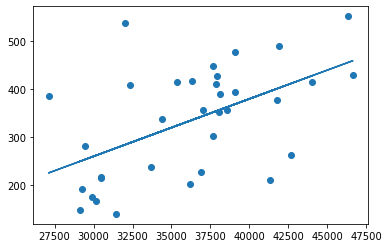

In [16]:
x = df_small['Shipload']
y = df_small['HandlingRate']

slope, intercept, r, p, std_err = scipy.stats.linregress(x, y)

def myfunc(x):
  return slope * x + intercept

mymodel = list(map(myfunc, x))

plt.scatter(x, y)
plt.plot(x, mymodel)
plt.show()

In [17]:
slope, intercept

(0.011928699746854923, -97.6032404300301)

In [18]:
r

0.5334976053036252

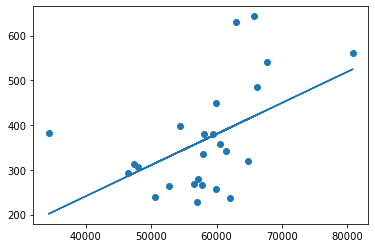

In [19]:
x = df_large['Shipload']
y = df_large['HandlingRate']

slope, intercept, r, p, std_err = scipy.stats.linregress(x, y)

def myfunc(x):
  return slope * x + intercept

mymodel = list(map(myfunc, x))

plt.scatter(x, y)
plt.plot(x, mymodel)
plt.show()

In [20]:
slope, intercept

(0.00694699976110053, -36.649593008354714)

In [21]:
r

0.5043596283511541

In [423]:
from sklearn.preprocessing import StandardScaler

In [425]:
#scale = StandardScaler()
#X = scale.fit_transform(X)

In [426]:
from sklearn.model_selection import train_test_split

In [427]:
X_train, X_test, y_train, y_test = train_test_split (X ,y ,test_size=0.2, random_state=0)

In [428]:
from sklearn.preprocessing import PolynomialFeatures

In [429]:
poly = PolynomialFeatures(degree=3)

In [430]:
X_poly = poly.fit_transform(X_train)

ValueError: Expected 2D array, got 1D array instead:
array=[37682.7432279  56985.05619    52172.1405     41337.71353
 30167.79331    54355.33327    46645.91116    59479.7561908
 63022.44517    64737.93377    57091.9451499  36908.29373
 44045.98841    47954.001      34359.41738    80833.41615
 41883.23149    57780.49306    29891.59791    50526.99332
 52778.51058    29473.00668    30451.58648    74954.01159
 57977.55483    20672.96178    37682.7432279  66234.375
 37026.05768    60497.55582    38551.99194    21166.58385
 41765.625      35332.50233    42680.06524    38061.80029
 58019.27534681 39049.34892    29282.09435669 47338.44803
 37888.65195    29096.82703    39090.71082    65662.28647
 32349.1552     56577.28783    31422.71217    32033.75777
 67725.25454    33659.61054    46354.08884    38086.06021   ].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [403]:
poly.fit(X_train,y_train)

PolynomialFeatures(degree=3)

In [404]:
from sklearn.linear_model import LinearRegression

In [405]:
model = LinearRegression()

In [406]:
model.fit(X_poly,y_train)

LinearRegression()

In [408]:
y_pred = model.predict(poly.fit_transform(X_test))

In [412]:
y_pred

array([ 408.94950851,  339.14889689,  401.28719901, 1305.26045147,
        163.30704018,  424.14487435,  429.24575587,   16.52552424,
        441.89504594,  321.1609445 ,  337.14058781,  343.12247023,
        328.5106359 ])

In [413]:
y_test

array([256.66511087, 416.68157561, 448.49996185, 150.22978881,
       293.05867419, 385.15371191, 340.99559531, 381.54687185,
       236.24242122, 203.76089518, 215.8156377 , 875.13428114,
       427.2243337 ])

In [414]:
r2_score(y_test,y_pred)

-3.699139004945434